In [2]:
import pandas as pd

df = pd.read_csv('../data/raw/Last.fm_data.csv', usecols=['Username', 'Artist', 'Track', 'Date', 'Time'])


In [3]:
df = df.dropna(subset=['Username', 'Track', 'Artist'])

In [4]:
df = df.drop_duplicates(subset=['Username', 'Track', 'Date', 'Time'])

In [5]:
df_playcount = df.groupby(['Username', 'Track']).size().reset_index(name='play_count')

In [6]:
track_counts = df_playcount['Track'].value_counts()
df_filtered = df_playcount[df_playcount['Track'].isin(track_counts[track_counts > 3].index)]
from scipy.sparse import csr_matrix

In [8]:
user_item_matrix = df_filtered.pivot(index='Username', columns='Track', values='play_count').fillna(0)
sparse_matrix = csr_matrix(user_item_matrix.values)

import scipy.sparse
scipy.sparse.save_npz('../data/processed/user_item_matrix.npz', sparse_matrix)
print(sparse_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 42127 stored elements and shape (11, 7298)>
  Coords	Values
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	2.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	7.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 11)	1.0
  (0, 12)	3.0
  (0, 13)	1.0
  (0, 14)	2.0
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 17)	2.0
  (0, 18)	2.0
  (0, 19)	2.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 24)	1.0
  (0, 25)	2.0
  (0, 27)	2.0
  :	:
  (10, 7066)	1.0
  (10, 7068)	1.0
  (10, 7076)	1.0
  (10, 7079)	1.0
  (10, 7081)	1.0
  (10, 7087)	1.0
  (10, 7093)	1.0
  (10, 7094)	1.0
  (10, 7105)	1.0
  (10, 7107)	1.0
  (10, 7109)	1.0
  (10, 7110)	1.0
  (10, 7112)	1.0
  (10, 7127)	1.0
  (10, 7143)	1.0
  (10, 7161)	1.0
  (10, 7217)	1.0
  (10, 7223)	1.0
  (10, 7224)	3.0
  (10, 7242)	1.0
  (10, 7249)	1.0
  (10, 7254)	1.0
  (10, 7259)	1.0
  (10, 7292)	1.0
  (10, 7295)	11.0


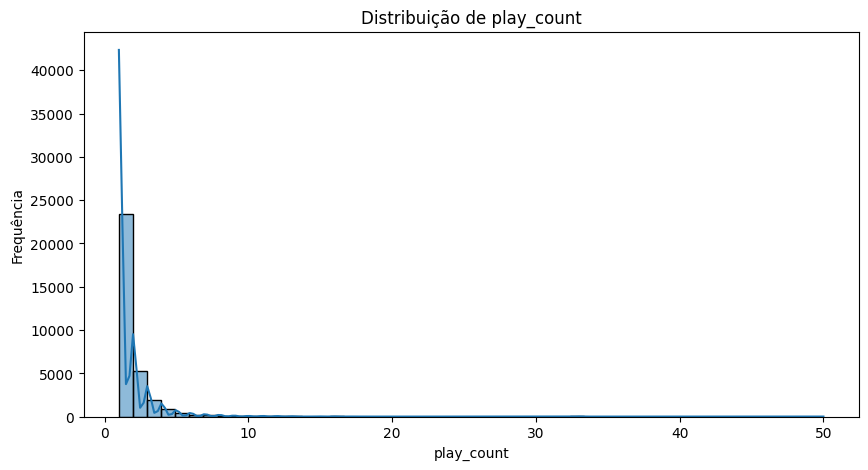

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, skew, kurtosis

plt.figure(figsize=(10,5))
sns.histplot(df_filtered['play_count'], bins=50, kde=True)
plt.title('Distribuição de play_count')
plt.xlabel('play_count')
plt.ylabel('Frequência')
plt.show()

In [ ]:
shapiro_test = shapiro(df_filtered['play_count'].sample(5000, random_state=42)) if len(df_filtered) > 5000 else shapiro(df_filtered['play_count'])
print(f'Teste de Shapiro-Wilk: estatística={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}')


Teste de Shapiro-Wilk: estatística=0.4371, p-valor=0.0000


In [ ]:
ks_test = kstest(df_filtered['play_count'], 'norm')
print(f'Teste KS: estatística={ks_test.statistic:.4f}, p-valor={ks_test.pvalue:.4f}')


Teste KS: estatística=0.8413, p-valor=0.0000


In [ ]:
print(f'Skewness (Assimetria): {skew(df_filtered["play_count"]):.4f}')
print(f'Kurtosis (Curtose): {kurtosis(df_filtered["play_count"]):.4f}')

Skewness (Assimetria): 9.3114
Kurtosis (Curtose): 153.5300
